In [76]:
import pandas as pd
import numpy as np
import os
import numpy
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

## Define some generally useful functions

In [11]:
def calculate_regression_line(x, y):
    """
    Calculates the regression line between two 1-dimensional vectors using scikit-learn.

    Parameters:
    x (numpy array or list): The independent variable vector.
    y (numpy array or list): The dependent variable vector.

    Returns:
    tuple: A tuple containing the slope and intercept of the regression line.
    """
    # Convert the input vectors to numpy arrays if they are not already
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Fit the linear regression model
    regression_model = LinearRegression()
    regression_model.fit(x, y)

    # Extract the slope and intercept of the regression line
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    return slope, intercept

## Define locations

In [2]:
loc_medical_costs = os.path.join('..', 'data', 'insurance.csv')

## Read data

In [3]:
df_medical_costs = pd.read_csv(loc_medical_costs)

## Perform linear regression only based on age

In [4]:
df_medical_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='age', ylabel='charges'>

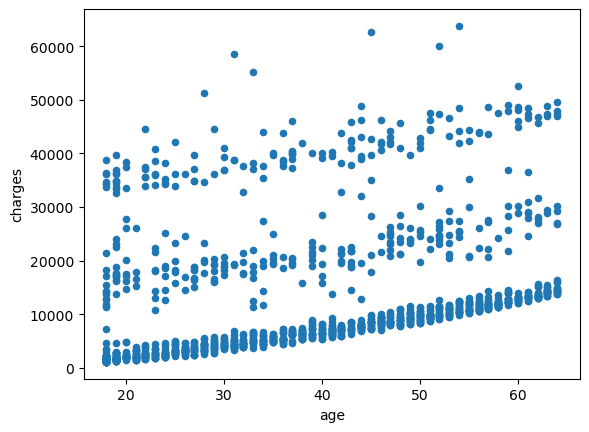

In [5]:
df_medical_costs.plot.scatter(x = 'age', y = 'charges')

## Plotting the cost function

In [101]:
def compute_rmse(yhat, y):
    """
    Computes the root mean squared error (RMSE) between yhat and y.

    Parameters:
        yhat (array-like): Predicted values.
        y (array-like): True values.

    Returns:
        float: Root mean squared error (RMSE).
    """
    # Convert yhat and y to numpy arrays
    yhat = np.array(yhat)
    y = np.array(y)

    # Compute the squared error
    squared_error = np.abs(yhat - y) ** 2

    # Compute the mean squared error
    mean_squared_error = np.mean(squared_error)

    # Compute the root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

def evaluate_model(x, slope, intercept):

    return intercept + slope * x

In [103]:
ages = df_medical_costs['age']
charges = df_medical_costs['charges']

slope_opt, intercept_opt = calculate_regression_line(ages, charges)

theta_0_range = np.linspace(0, intercept_opt * 2)
theta_1_range = np.linspace(0, slope_opt * 2)

theta_0_grid, theta_1_grid = np.meshgrid(theta_0_range, theta_1_range)

# This is highly inefficient as we will see further on (we should vectorize these computations).
model_values = np.zeros( (len(theta_0_range), len(theta_1_range), len(ages)) )
model_performance = np.zeros( (len(theta_0_range), len(theta_1_range)) )

for i, theta_0 in tqdm(enumerate(theta_0_range)):
    for j, theta_1 in enumerate(theta_1_range):
        for k, age in enumerate(ages):
            model_values[i, j, k] = evaluate_model(age, theta_1, theta_0)
        model_performance[i, j] = compute_rmse(model_values[i, j, :], charges)

50it [00:04, 10.48it/s]


## RMSE visualized

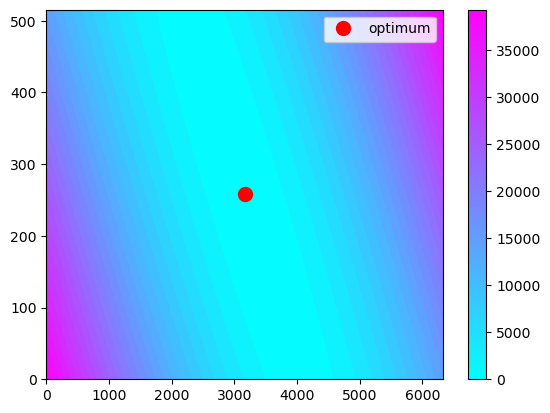

In [104]:
fig, ax = plt.subplots()

norm = colors.Normalize(vmin=np.min(model_values), vmax=np.max(model_values))
scalar_map = cm.ScalarMappable(norm=norm, cmap='cool')
ax.contourf(theta_0_grid, theta_1_grid, model_performance, levels = 30, cmap = 'cool')
cbar = plt.colorbar(scalar_map, ax = ax)

ax.plot([intercept_opt], [slope_opt], color = 'r', marker = '.', markersize = 20, label = 'optimum', ls = '')
ax.legend()

## Alternative error functions

In [108]:
yhat = slope_opt * ages + intercept_opt
MAE = np.mean(np.abs(yhat - charges))
MPE = np.mean(np.abs(yhat - charges) / yhat)


## Visualize erros

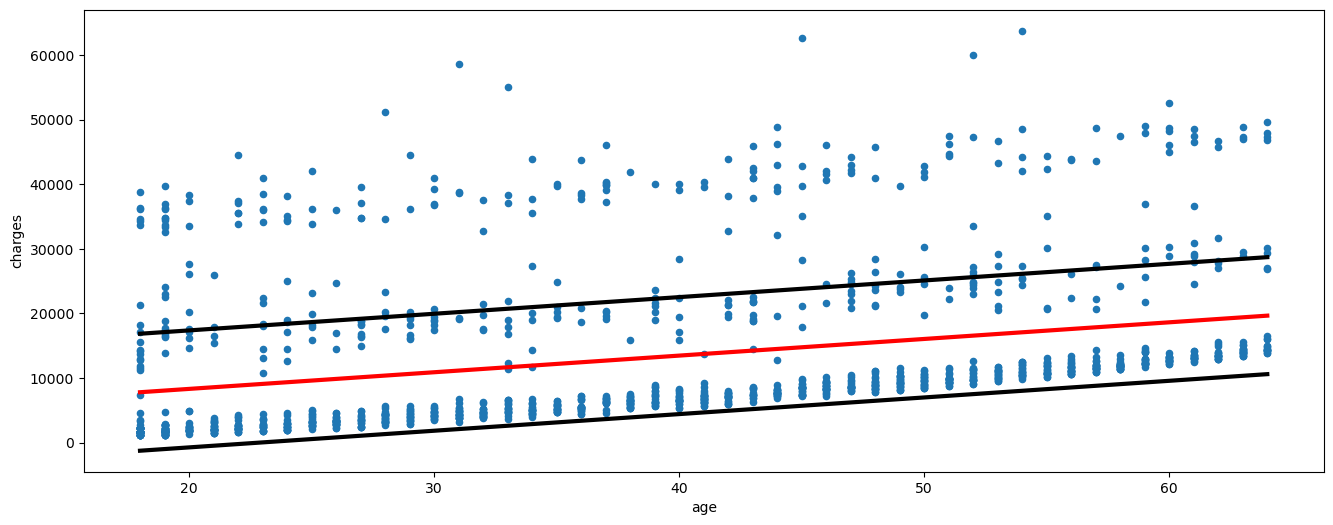

In [114]:
fig, ax = plt.subplots(figsize = (16, 6))
df_medical_costs.plot.scatter(x = 'age', y = 'charges', ax = ax)

xx = np.linspace(df_medical_costs.age.min(), df_medical_costs.age.max(), num = 100)
yy = intercept_opt + slope_opt * xx
ax.plot(xx, yy, color = 'r', lw = 3)
ax.plot(xx, yy - MAE, color = 'k', lw = 3)
ax.plot(xx, yy + MAE, color = 'k', lw = 3)

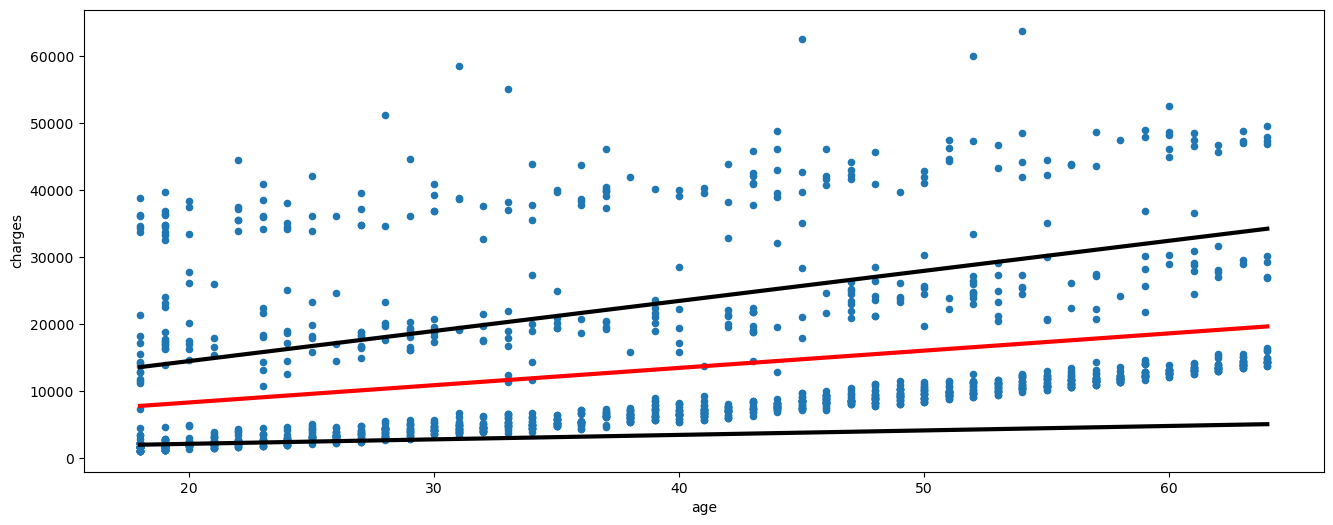

In [115]:
fig, ax = plt.subplots(figsize = (16, 6))
df_medical_costs.plot.scatter(x = 'age', y = 'charges', ax = ax)

xx = np.linspace(df_medical_costs.age.min(), df_medical_costs.age.max(), num = 100)
yy = intercept_opt + slope_opt * xx
ax.plot(xx, yy, color = 'r', lw = 3)
ax.plot(xx, yy * (1 + MPE), color = 'k', lw = 3)
ax.plot(xx, yy * (1 - MPE), color = 'k', lw = 3)